In [33]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_6-28-2022"

D:\School\Graduate 2022 Summer\Data\OneDrive_1_6-28-2022


In [34]:
pwd()

'D:\\School\\Graduate 2022 Summer\\Data\\OneDrive_1_6-28-2022'

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
first_file = pd.read_csv('SimData_2022.06.23_09.15.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

second_file = pd.read_csv('SimData_2022.06.23_10.18.17.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

third_file = pd.read_csv('SimData_2022.06.23_11.22.59.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

# fourth_file = pd.read_csv('SimData_2022.06.23_14.01.41.csv.roar.csv',
#                 parse_dates = {'datetime': ['date', 'time']},
#                 low_memory=False)


df = pd.concat([first_file, second_file, third_file])

In [37]:
df

,datetime,_id,latitude,longitude,gpsAltitude,absoluteAltitude,magneticHeading,trueHeading,pitch,roll,...,hasMainRotorLowRpmWarning,hasMainRotorHighRpmWarning,hasTailRotorChipWarning,hasTransmissionChipCaution,hasTransmissionOilTemperatureWarning,hasTransmissionOilPressureWarning,timestamp,gpsDateTime,seconds,vil
0,2022-06-23 13:15:35.117,::1656004535.117,39.464851,-74.565964,57.58,0.06,219.262,206.962,0.063,-0.293,...,False,False,False,False,False,False,2022-06-23T13:15:35.117Z,2022-06-23T13:15:35.117Z,1.656005e+09,-2
1,2022-06-23 13:15:35.136,::1656004535.136,39.464851,-74.565964,57.58,0.06,219.260,206.960,0.062,-0.289,...,False,False,False,False,False,False,2022-06-23T13:15:35.136Z,2022-06-23T13:15:35.136Z,1.656005e+09,-2
2,2022-06-23 13:15:35.156,::1656004535.156,39.464851,-74.565964,57.58,0.06,219.258,206.957,0.062,-0.284,...,False,False,False,False,False,False,2022-06-23T13:15:35.156Z,2022-06-23T13:15:35.156Z,1.656005e+09,-2
3,2022-06-23 13:15:35.176,::1656004535.176,39.464851,-74.565964,57.58,0.06,219.255,206.954,0.061,-0.278,...,False,False,False,False,False,False,2022-06-23T13:15:35.176Z,2022-06-23T13:15:35.176Z,1.656005e+09,-2
4,2022-06-23 13:15:35.197,::1656004535.197,39.464851,-74.565964,57.58,0.06,219.252,206.952,0.060,-0.271,...,False,False,False,False,False,False,2022-06-23T13:15:35.197Z,2022-06-23T13:15:35.197Z,1.656005e+09,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105524,2022-06-23 16:00:27.355,::1656014427.355,39.464858,-74.565952,57.58,0.06,124.307,112.006,0.382,0.235,...,False,False,False,False,False,False,2022-06-23T16:00:27.355Z,2022-06-23T16:00:27.355Z,1.656014e+09,-2
105525,2022-06-23 16:00:27.375,::1656014427.375,39.464858,-74.565952,57.58,0.06,124.306,112.006,0.382,0.235,...,False,False,False,False,False,False,2022-06-23T16:00:27.375Z,2022-06-23T16:00:27.375Z,1.656014e+09,-2
105526,2022-06-23 16:00:27.394,::1656014427.394,39.464858,-74.565952,57.58,0.06,124.306,112.006,0.382,0.235,...,False,False,False,False,False,False,2022-06-23T16:00:27.394Z,2022-06-23T16:00:27.394Z,1.656014e+09,-2
105527,2022-06-23 16:00:27.414,::1656014427.414,39.464858,-74.565952,57.58,0.06,124.306,112.006,0.382,0.235,...,False,False,False,False,False,False,2022-06-23T16:00:27.414Z,2022-06-23T16:00:27.414Z,1.656014e+09,-2


In [38]:
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()

C:\Users\david\AppData\Local\Temp\ipykernel_10956\923529837.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [40]:
df3['HoverOrNot'] = 0

df3.loc[(df3['datetime'].between('2022-06-23 13:30:45' , '2022-06-23 13:32:44' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 13:36:15' , '2022-06-23 13:37:22' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-23 13:41:25' , '2022-06-23 13:42:11' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 13:44:54' , '2022-06-23 13:46:20' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-23 13:50:19' , '2022-06-23 13:50:59' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-23 14:00:20' , '2022-06-23 14:01:00' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:01:00' , '2022-06-23 14:01:40' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:01:40' , '2022-06-23 14:02:00' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:02:00' , '2022-06-23 14:02:29' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:02:30' , '2022-06-23 14:03:00' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:03:22' , '2022-06-23 14:04:00' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:09:35' , '2022-06-23 14:15:00' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:22:38' , '2022-06-23 14:23:16' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-23 14:27:48' , '2022-06-23 14:29:21' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-23 14:34:35' , '2022-06-23 14:37:05' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:38:00' , '2022-06-23 14:42:18' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:44:00' , '2022-06-23 14:47:12' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:47:30' , '2022-06-23 14:50:59' , inclusive='both')),['HoverOrNot']] = 1
df3.loc[(df3['datetime'].between('2022-06-23 14:52:00' , '2022-06-23 14:53:52' , inclusive='both')),['HoverOrNot']] = 1


df3.loc[(df3['datetime'].between('2022-06-23 14:56:26' , '2022-06-23 14:58:34' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-23 14:59:37' , '2022-06-23 15:01:25' , inclusive='both')),['HoverOrNot']] = 1

# Double check to see hasWeightOnWheels = 1, then set Hover Or Not = 0
df3.loc[(df3['hasWeightOnWheels'] == 1), ['HoverOrNot']] = 0

<h2> Since hover data is only 1/4 of the dataset, hence we have to randomly select the same amount of data for not hover

In [44]:
len(df3[(df3['HoverOrNot'] == 1)]) #2028
len(df3[(df3['HoverOrNot'] == 0)]) #6683

# Randomly sample dataset where hoverOrNot is 0
df4 = df3[(df3['HoverOrNot'] == 0)].sample(n=2028, replace=False, random_state=21321321)

# Concat data from where HoverOrNot = 1 and HoverOrNot = 0

df5 = pd.concat([df3[(df3['HoverOrNot'] == 1)], df4], ignore_index=True)

# Shuffle data in random way
df5 = df5.sample(frac=1)

In [45]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['absoluteAltitude',
                 'trueHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']               
                
                
X = df5[feature_names]
y = df5['HoverOrNot']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.82


In [75]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

xgb_cl  = xgb.XGBClassifier(
                objective="binary:logistic",
                )
param_grid = {
    "max_depth": [5, 7, 9],
    "learning_rate": [0.075, 0.1, 0.05],
    "gamma": [0.025, 0.0075, 0.015],
    "reg_lambda": [0, 1, 0.5],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
_ = grid_cv.fit(X_train, y_train)

In [87]:
grid_cv.best_score_

0.9723576555960783

In [88]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.015,
 'learning_rate': 0.1,
 'max_depth': 9,
 'reg_lambda': 0,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [89]:
xgb_classifier = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

xgb_classifier.fit(X_train,y_train)

print('Accuracy of XGBoost Classifier on training set: {:.2f}'
     .format(accuracy_score(y_train, xgb_classifier.predict(X_train))))


print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(accuracy_score(y_test, xgb_classifier.predict(X_test))))

Accuracy of XGBoost Classifier on training set: 1.00
Accuracy of XGBoost classifier on test set: 0.90


<h2> Using XGBoost model to predict the validation file

<H4> Processing the validation file to make it into the same structure

In [90]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"

validation_file = pd.read_csv('SimData_2022.06.30_09.43.28.csv.roar.csv',
                    parse_dates = {'datetime': ['date', 'time']},
                    low_memory=False)

validation_file = validation_file[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
validation_file = validation_file.groupby(by=["datetime"], dropna=False).mean().reset_index()

validation_file['HoverOrNot'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:48:49' , '2022-06-30 13:50:05' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:50:15' , '2022-06-30 13:51:45' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:51:58' , '2022-06-30 13:52:20' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:53:15' , '2022-06-30 13:54:18' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:55:29' , '2022-06-30 13:56:15' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:56:23' , '2022-06-30 13:57:13' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:59:00' , '2022-06-30 14:00:14' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:12' , '2022-06-30 14:03:50' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:38' , '2022-06-30 14:03:28' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:05:25' , '2022-06-30 14:19:30' , inclusive='both')),['HoverOrNot']] = 1


validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:22:40' , '2022-06-30 14:24:40' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:23:01' , '2022-06-30 14:24:35' , inclusive='both')),['HoverOrNot']] = 1



# # Eliminate data where hasWeightOnWheels = 1
# validation_file = validation_file.loc[(validation_file['hasWeightOnWheels'] == 0)]

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


In [91]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']


X_valid = scaler.transform(X_validation)

In [92]:
validation_xgb = xgb_classifier.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_xgb))

Accuracy of Model:: 0.8506389776357828


In [93]:
validation_svm = svm.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

Accuracy of Model:: 0.8742012779552716


In [94]:
validation_file['HoverOrNot'] = validation_file['HoverOrNot'] * 10

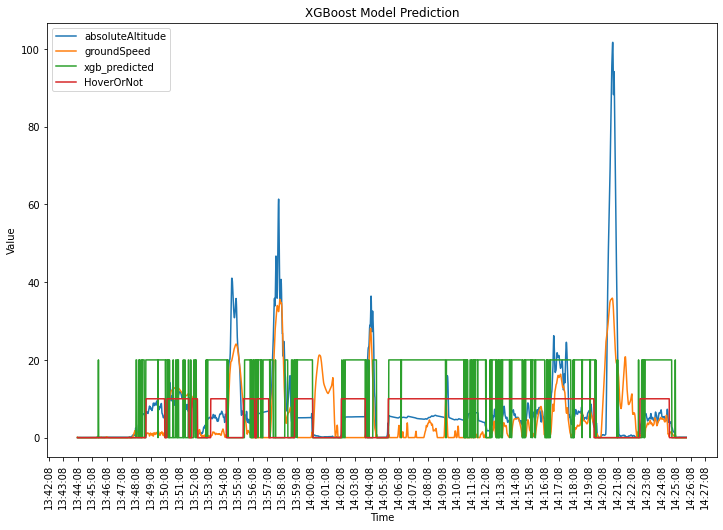

In [95]:
import matplotlib.dates as mdates

validation_file['xgb_predicted'] = validation_xgb * 20

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = validation_file,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','xgb_predicted',
         data = validation_file,
         label = "xgb_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

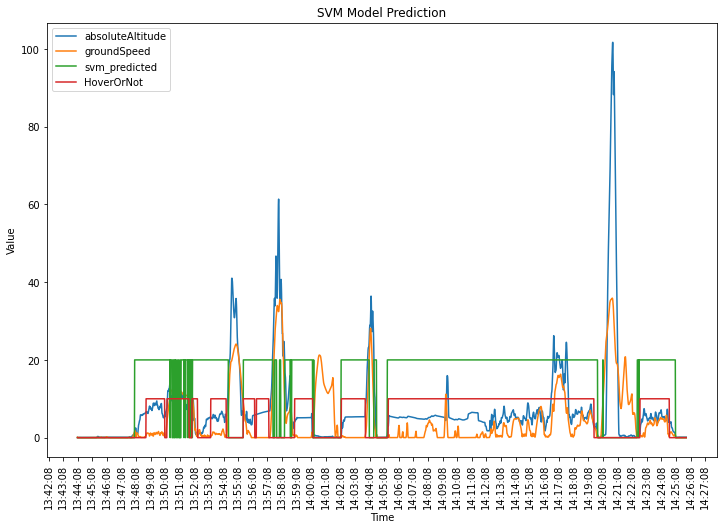

In [73]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm * 20

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = validation_file,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','svm_predicted',
         data = validation_file,
         label = "svm_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()